Use Tensorflow 2 to train a neural network for the binary classification of cats and dogs based on images from this dataset. Images must be transformed from JPG to RGB (or grayscale) pixel values and scaled down. Experiment with different network architectures and training parameters documenting their influence of the final predictive performance. Use 5-fold cross validation to compute your risk estimates. While the training loss can be chosen freely, the reported cross-validated estimates must be computed according to the zero-one loss.

In [3]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import os
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError,Image, ImageFile
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import regularizers

Pre-processing

In [6]:
cats_folder = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Cats"
dogs_folder = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dogs"

In [7]:
cat_files = [f for f in listdir(cats_folder) if isfile(join(cats_folder, f))]
dog_files = [f for f in listdir(dogs_folder) if isfile(join(dogs_folder, f))]

In [35]:
for i in dog_files :
    os.rename(dogs_folder +'\\' + i, dogs_folder + '\\' +  'dog_' + i)

In [36]:
for i in cat_files :
    os.rename(cats_folder +'\\' + i, cats_folder + '\\' +  'cat_' + i)

In [9]:
cat_files = [f for f in listdir(cats_folder) if isfile(join(cats_folder, f))]
dog_files = [f for f in listdir(dogs_folder) if isfile(join(dogs_folder, f))]

In [8]:
dog_name = ['dog']*len(dog_files)
cat_name = ['cat']*len(cat_files)

In [9]:
df_cat = pd.DataFrame({'filename' : cat_files,'label' : cat_name})
df_dog = pd.DataFrame({'filename' : dog_files,'label' : dog_name})

In [10]:
df = pd.concat([df_cat, df_dog])
df

,filename,label
0,cat_0.jpg,cat
1,cat_1.jpg,cat
2,cat_10.jpg,cat
3,cat_100.jpg,cat
4,cat_1000.jpg,cat
...,...,...
12494,dog_9995.jpg,dog
12495,dog_9996.jpg,dog
12496,dog_9997.jpg,dog
12497,dog_9998.jpg,dog


In [ ]:
#we create a folder with the full images

In [13]:
#eliminate corrupted file
path = Path(r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1° model (1 convolutional level)

In [11]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

Model 1: 2 Conv layer

In [23]:
def create_model ():
     model=Sequential()
     model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width ,Image_Height,Image_Channels)))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(64,(3,3),activation='relu'))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Flatten())
     model.add(Dense(32))
     model.add(Dropout(0.5, seed = 42))
     model.add(Dense(2,activation='sigmoid'))
     model.compile(loss='binary_crossentropy',
     optimizer='Adam',metrics=['accuracy'])
     return model

Found 15998 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Epoch 1/50
 29/125 [=====>........................] - ETA: 35s - loss: 5.5038 - accuracy: 0.5496

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 70s 553ms/step - loss: 2.0896 - accuracy: 0.5638 - val_loss: 0.6931 - val_accuracy: 0.5120
Epoch 2/50
125/125 [==============================] - 52s 418ms/step - loss: 0.6532 - accuracy: 0.6460 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/50
125/125 [==============================] - 50s 399ms/step - loss: 0.5953 - accuracy: 0.6896 - val_loss: 0.6897 - val_accuracy: 0.5085
Epoch 4/50
125/125 [==============================] - 47s 378ms/step - loss: 0.5662 - accuracy: 0.7207 - val_loss: 0.6965 - val_accuracy: 0.5403
Epoch 5/50
125/125 [==============================] - 47s 375ms/step - loss: 0.5753 - accuracy: 0.7099 - val_loss: 0.6216 - val_accuracy: 0.6835
Epoch 6/50
125/125 [==============================] - 46s 368ms/step - loss: 0.5417 - accuracy: 0.7436 - val_loss: 0.5807 - val_accuracy: 0.6963
Epoch 7/50
125/125 [==============================] - 46s 370ms/step - loss: 0.5304 - accuracy: 0.7460 - val_loss: 0.5933 - val_accuracy: 0.7

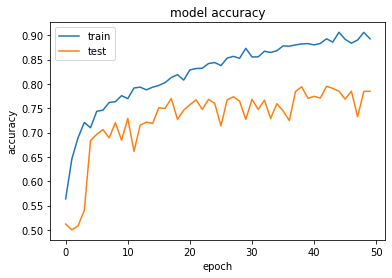

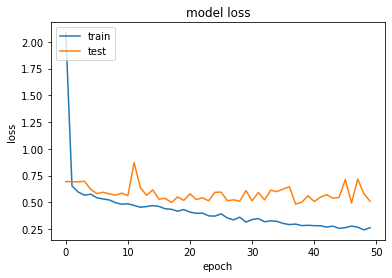

accuracy: 78.06%
CV accuracy = 78.06% (+/- 0.00%)


In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=66)
cvscores = []
kf2 = KFold(n_splits=5,shuffle=True, random_state=66)
ImageFile.LOAD_TRUNCATED_IMAGES = True
n = 1
for val_train_index, test_index in kf.split(df):
    val_train, df_test = df.iloc[val_train_index], df.iloc[test_index]
    train, validation = next(kf2.split(val_train))
    df_train, df_validation = val_train.iloc[train], val_train.iloc[validation]
    if n <= 0 :
        break 
    

    image_datagen = ImageDataGenerator(
    rescale=1./255)

    train_generator = image_datagen.flow_from_dataframe(
        df_train, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    val_generator = image_datagen.flow_from_dataframe(
        df_validation, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    test_datagen=ImageDataGenerator(rescale=1./255)

    test_generator = image_datagen.flow_from_dataframe(
        df_test, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32) 

    model  = create_model()

    history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 125,
    steps_per_epoch = 125)

    model.summary()
    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    print(loss_values)
    print(val_loss_values)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    scores = model.evaluate(test_generator, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    n =-1

    
print("CV accuracy = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

2nd Model: 3nd Conv layer

In [25]:
def create_model_2 ():
     model=Sequential()
     model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width ,Image_Height,Image_Channels)))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(64,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(128,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Flatten())
     model.add(Dense(32))
     model.add(Dropout(0.5, seed = 42))
     model.add(Dense(2,activation='sigmoid'))
     model.compile(loss='binary_crossentropy',
     optimizer='Adam',metrics=['accuracy'])
     return model

Found 15998 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 62s 488ms/step - loss: 0.9360 - accuracy: 0.5217 - val_loss: 0.6933 - val_accuracy: 0.5010
Epoch 2/50
125/125 [==============================] - 61s 485ms/step - loss: 0.6777 - accuracy: 0.5340 - val_loss: 0.6883 - val_accuracy: 0.5485
Epoch 3/50
125/125 [==============================] - 61s 486ms/step - loss: 0.6580 - accuracy: 0.6072 - val_loss: 0.6781 - val_accuracy: 0.5673
Epoch 4/50
125/125 [==============================] - 61s 486ms/step - loss: 0.6442 - accuracy: 0.6037 - val_loss: 0.6858 - val_accuracy: 0.5400
Epoch 5/50
 16/125 [==>...........................] - ETA: 43s - loss: 0.6506 - accuracy: 0.6055

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 61s 487ms/step - loss: 0.6344 - accuracy: 0.6245 - val_loss: 0.6767 - val_accuracy: 0.5577
Epoch 6/50
125/125 [==============================] - 61s 485ms/step - loss: 0.6345 - accuracy: 0.6125 - val_loss: 0.6830 - val_accuracy: 0.5422
Epoch 7/50
125/125 [==============================] - 60s 481ms/step - loss: 0.6182 - accuracy: 0.6373 - val_loss: 0.6381 - val_accuracy: 0.6072
Epoch 8/50
125/125 [==============================] - 61s 484ms/step - loss: 0.6271 - accuracy: 0.6338 - val_loss: 0.6465 - val_accuracy: 0.6025
Epoch 9/50
125/125 [==============================] - 60s 481ms/step - loss: 0.6254 - accuracy: 0.6298 - val_loss: 0.6983 - val_accuracy: 0.5225
Epoch 10/50
125/125 [==============================] - 60s 482ms/step - loss: 0.6270 - accuracy: 0.6411 - val_loss: 0.6278 - val_accuracy: 0.6680
Epoch 11/50
125/125 [==============================] - 60s 483ms/step - loss: 0.6186 - accuracy: 0.6413 - val_loss: 0.6108 - val_accuracy: 0

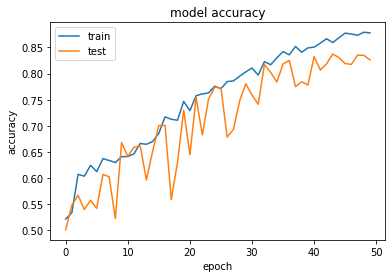

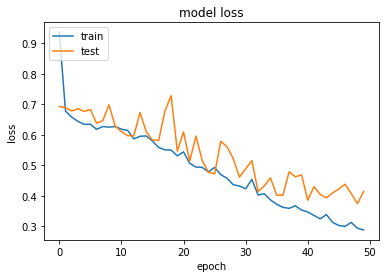

accuracy: 81.52%
CV accuracy = 81.52% (+/- 0.00%)


In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=66)
cvscores = []
kf2 = KFold(n_splits=5,shuffle=True, random_state=66)
ImageFile.LOAD_TRUNCATED_IMAGES = True
n = 1
for val_train_index, test_index in kf.split(df):
    val_train, df_test = df.iloc[val_train_index], df.iloc[test_index]
    train, validation = next(kf2.split(val_train))
    df_train, df_validation = val_train.iloc[train], val_train.iloc[validation]
    if n <= 0 :
        break 
    

    image_datagen = ImageDataGenerator(
    rescale=1./255)

    train_generator = image_datagen.flow_from_dataframe(
        df_train, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    val_generator = image_datagen.flow_from_dataframe(
        df_validation, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    test_datagen=ImageDataGenerator(rescale=1./255)

    test_generator = image_datagen.flow_from_dataframe(
        df_test, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32) 

    model  = create_model_2()

    history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 125,
    steps_per_epoch = 125)

    model.summary()
    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    print(loss_values)
    print(val_loss_values)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    scores = model.evaluate(test_generator, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    n =-1

    
print("CV accuracy = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

3° model (3 convulutional layer)

In [27]:
def create_model_3 ():
     model=Sequential()
     model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width ,Image_Height,Image_Channels)))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(64,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(128,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Conv2D(128,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Flatten())
     model.add(Dense(32))
     model.add(Dropout(0.5, seed = 42))
     model.add(Dense(2,activation='sigmoid'))
     model.compile(loss='binary_crossentropy',
     optimizer='Adam',metrics=['accuracy'])
     return model

Found 15998 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 98s 771ms/step - loss: 0.7123 - accuracy: 0.5408 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/50
125/125 [==============================] - 72s 577ms/step - loss: 0.6546 - accuracy: 0.6212 - val_loss: 0.6766 - val_accuracy: 0.5847
Epoch 3/50
125/125 [==============================] - 67s 534ms/step - loss: 0.6285 - accuracy: 0.6506 - val_loss: 0.6929 - val_accuracy: 0.5347
Epoch 4/50
 19/125 [===>..........................] - ETA: 45s - loss: 0.5851 - accuracy: 0.6842

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 65s 522ms/step - loss: 0.5898 - accuracy: 0.6845 - val_loss: 0.6665 - val_accuracy: 0.5748
Epoch 5/50
125/125 [==============================] - 65s 519ms/step - loss: 0.5940 - accuracy: 0.6950 - val_loss: 0.5863 - val_accuracy: 0.7038
Epoch 6/50
125/125 [==============================] - 64s 515ms/step - loss: 0.5702 - accuracy: 0.7212 - val_loss: 0.5626 - val_accuracy: 0.6977
Epoch 7/50
125/125 [==============================] - 64s 512ms/step - loss: 0.5214 - accuracy: 0.7467 - val_loss: 0.5717 - val_accuracy: 0.7072
Epoch 8/50
125/125 [==============================] - 64s 511ms/step - loss: 0.5127 - accuracy: 0.7527 - val_loss: 0.4892 - val_accuracy: 0.7710
Epoch 9/50
125/125 [==============================] - 63s 505ms/step - loss: 0.5039 - accuracy: 0.7561 - val_loss: 0.4845 - val_accuracy: 0.7688
Epoch 10/50
125/125 [==============================] - 63s 505ms/step - loss: 0.4804 - accuracy: 0.7811 - val_loss: 0.5364 - val_accuracy: 0.

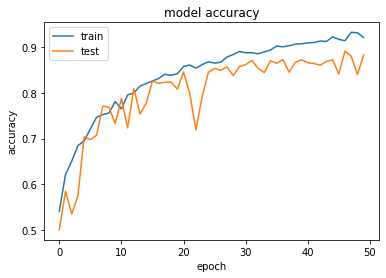

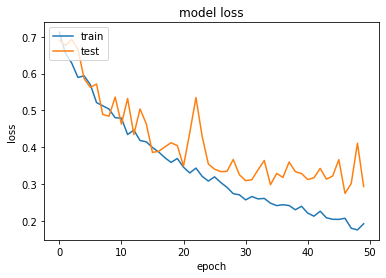

accuracy: 87.70%
CV accuracy = 87.70% (+/- 0.00%)


In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=66)
cvscores = []
kf2 = KFold(n_splits=5,shuffle=True, random_state=66)
ImageFile.LOAD_TRUNCATED_IMAGES = True
n = 1
for val_train_index, test_index in kf.split(df):
    val_train, df_test = df.iloc[val_train_index], df.iloc[test_index]
    train, validation = next(kf2.split(val_train))
    df_train, df_validation = val_train.iloc[train], val_train.iloc[validation]
    if n <= 0 :
        break 
    

    image_datagen = ImageDataGenerator(
    rescale=1./255)

    train_generator = image_datagen.flow_from_dataframe(
        df_train, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    val_generator = image_datagen.flow_from_dataframe(
        df_validation, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    test_datagen=ImageDataGenerator(rescale=1./255)

    test_generator = image_datagen.flow_from_dataframe(
        df_test, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32) 

    model  = create_model_3()

    history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 125,
    steps_per_epoch = 125)

    model.summary()
    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    print(loss_values)
    print(val_loss_values)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    scores = model.evaluate(test_generator, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    n =-1

    
print("CV accuracy = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

4th model: More cons conv

In [29]:
def create_model_4 ():
     model=Sequential()
     model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width ,Image_Height,Image_Channels)))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(32,(3,3),activation='relu'))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(32,(3,3),activation='relu'))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(32,(3,3),activation='relu'))
     model.add(Dropout(0.2, seed = 42))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Flatten())
     model.add(Dense(32))
     model.add(Dropout(0.5, seed = 42))
     model.add(Dense(2,activation='sigmoid'))
     model.compile(loss='binary_crossentropy',
     optimizer='Adam',metrics=['accuracy'])
     return model

Found 15998 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 97s 761ms/step - loss: 4.2418 - accuracy: 0.5692 - val_loss: 1.0961 - val_accuracy: 0.5362
Epoch 2/50
125/125 [==============================] - 84s 674ms/step - loss: 1.6665 - accuracy: 0.5885 - val_loss: 0.7864 - val_accuracy: 0.6043
Epoch 3/50
125/125 [==============================] - 75s 599ms/step - loss: 1.1654 - accuracy: 0.6243 - val_loss: 0.7549 - val_accuracy: 0.5897
Epoch 4/50
 50/125 [===========>..................] - ETA: 39s - loss: 0.8334 - accuracy: 0.6687

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 75s 601ms/step - loss: 0.7752 - accuracy: 0.6663 - val_loss: 0.6529 - val_accuracy: 0.6215
Epoch 5/50
125/125 [==============================] - 75s 601ms/step - loss: 0.6646 - accuracy: 0.6755 - val_loss: 0.6171 - val_accuracy: 0.6603
Epoch 6/50
125/125 [==============================] - 73s 581ms/step - loss: 0.6426 - accuracy: 0.6827 - val_loss: 0.5956 - val_accuracy: 0.6745
Epoch 7/50
125/125 [==============================] - 71s 568ms/step - loss: 0.6008 - accuracy: 0.7072 - val_loss: 0.5523 - val_accuracy: 0.7125
Epoch 8/50
125/125 [==============================] - 72s 573ms/step - loss: 0.5845 - accuracy: 0.7113 - val_loss: 0.5674 - val_accuracy: 0.7287
Epoch 9/50
125/125 [==============================] - 72s 579ms/step - loss: 0.5560 - accuracy: 0.7330 - val_loss: 0.5562 - val_accuracy: 0.7172
Epoch 10/50
125/125 [==============================] - 72s 577ms/step - loss: 0.5672 - accuracy: 0.7266 - val_loss: 0.5413 - val_accuracy: 0.

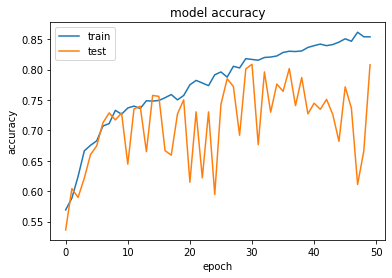

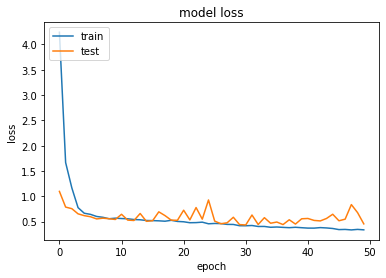

accuracy: 80.14%
CV accuracy = 80.14% (+/- 0.00%)


In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=66)
cvscores = []
kf2 = KFold(n_splits=5,shuffle=True, random_state=66)
ImageFile.LOAD_TRUNCATED_IMAGES = True
n = 1
for val_train_index, test_index in kf.split(df):
    val_train, df_test = df.iloc[val_train_index], df.iloc[test_index]
    train, validation = next(kf2.split(val_train))
    df_train, df_validation = val_train.iloc[train], val_train.iloc[validation]
    if n <= 0 :
        break 
    

    image_datagen = ImageDataGenerator(
    rescale=1./255)

    train_generator = image_datagen.flow_from_dataframe(
        df_train, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    val_generator = image_datagen.flow_from_dataframe(
        df_validation, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    test_datagen=ImageDataGenerator(rescale=1./255)

    test_generator = image_datagen.flow_from_dataframe(
        df_test, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32) 

    model  = create_model_4()

    history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 125,
    steps_per_epoch = 125)

    model.summary()
    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    print(loss_values)
    print(val_loss_values)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    scores = model.evaluate(test_generator, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    n =-1

    
print("CV accuracy = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

5th Model: 4 Conv layer (same # filter)

In [34]:
def create_model_5 ():
     model=Sequential()
     model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width ,Image_Height,Image_Channels)))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(32,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(32,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(32,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Flatten())
     model.add(Dense(32))
     model.add(Dropout(0.5, seed = 42))
     model.add(Dense(2,activation='sigmoid'))
     model.compile(loss='binary_crossentropy',
     optimizer='Adam',metrics=['accuracy'])
     return model

Found 15998 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 67s 522ms/step - loss: 0.7254 - accuracy: 0.5233 - val_loss: 0.6949 - val_accuracy: 0.4992
Epoch 2/50
125/125 [==============================] - 56s 444ms/step - loss: 0.6733 - accuracy: 0.5727 - val_loss: 0.6940 - val_accuracy: 0.5052
Epoch 3/50
 19/125 [===>..........................] - ETA: 38s - loss: 0.6549 - accuracy: 0.6003

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 52s 413ms/step - loss: 0.6536 - accuracy: 0.6022 - val_loss: 0.6791 - val_accuracy: 0.5410
Epoch 4/50
125/125 [==============================] - 48s 387ms/step - loss: 0.6286 - accuracy: 0.6392 - val_loss: 0.6614 - val_accuracy: 0.5890
Epoch 5/50
125/125 [==============================] - 48s 386ms/step - loss: 0.6403 - accuracy: 0.6198 - val_loss: 0.6786 - val_accuracy: 0.5362
Epoch 6/50
125/125 [==============================] - 48s 385ms/step - loss: 0.6329 - accuracy: 0.6352 - val_loss: 0.6690 - val_accuracy: 0.5617
Epoch 7/50
125/125 [==============================] - 48s 384ms/step - loss: 0.6102 - accuracy: 0.6637 - val_loss: 0.6466 - val_accuracy: 0.6288
Epoch 8/50
125/125 [==============================] - 49s 391ms/step - loss: 0.6010 - accuracy: 0.6785 - val_loss: 0.6719 - val_accuracy: 0.5652
Epoch 9/50
125/125 [==============================] - 48s 381ms/step - loss: 0.5808 - accuracy: 0.6951 - val_loss: 0.6264 - val_accuracy: 0.6

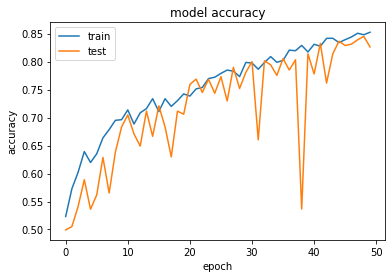

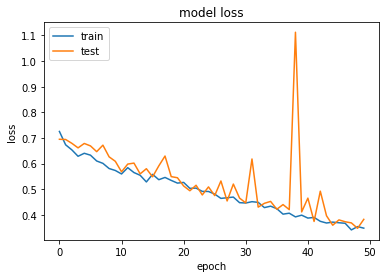

accuracy: 83.56%
CV accuracy = 83.56% (+/- 0.00%)


In [35]:
kf = KFold(n_splits=5, shuffle=True, random_state=66)
cvscores = []
kf2 = KFold(n_splits=5,shuffle=True, random_state=66)
ImageFile.LOAD_TRUNCATED_IMAGES = True
n = 1
for val_train_index, test_index in kf.split(df):
    val_train, df_test = df.iloc[val_train_index], df.iloc[test_index]
    train, validation = next(kf2.split(val_train))
    df_train, df_validation = val_train.iloc[train], val_train.iloc[validation]
    if n <= 0 :
        break 
    

    image_datagen = ImageDataGenerator(
    rescale=1./255)

    train_generator = image_datagen.flow_from_dataframe(
        df_train, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    val_generator = image_datagen.flow_from_dataframe(
        df_validation, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    test_datagen=ImageDataGenerator(rescale=1./255)

    test_generator = image_datagen.flow_from_dataframe(
        df_test, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32) 

    model  = create_model_5()

    history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 125,
    steps_per_epoch = 125)

    model.summary()
    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    print(loss_values)
    print(val_loss_values)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    scores = model.evaluate(test_generator, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    n =-1

    
print("CV accuracy = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

6th Model: 4 conv layer (different # filters)

In [31]:
def create_model_6 ():
     model=Sequential()
     model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width ,Image_Height,Image_Channels)))
     model.add(BatchNormalization())
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(64,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(128,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Conv2D(256,(3,3),activation='relu'))
     model.add(MaxPooling2D(pool_size=(2,2)))
     model.add(Dropout(0.2, seed = 42))
     model.add(Flatten())
     model.add(Dense(32, kernel_regularizer=regularizers.l2(0.01)))
     model.add(Dropout(0.5, seed = 42))
     model.add(Dense(2,activation='sigmoid'))
     model.compile(loss='binary_crossentropy',
     optimizer='Adam',metrics=['accuracy'])
     return model

Found 15998 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 117s 923ms/step - loss: 1.0795 - accuracy: 0.5610 - val_loss: 0.8463 - val_accuracy: 0.5247
Epoch 2/50
125/125 [==============================] - 79s 631ms/step - loss: 0.7450 - accuracy: 0.6180 - val_loss: 0.7480 - val_accuracy: 0.5268
Epoch 3/50
125/125 [==============================] - 73s 588ms/step - loss: 0.6680 - accuracy: 0.6557 - val_loss: 0.6948 - val_accuracy: 0.6110
Epoch 4/50
125/125 [==============================] - 71s 570ms/step - loss: 0.6443 - accuracy: 0.6700 - val_loss: 0.6873 - val_accuracy: 0.6183
Epoch 5/50
125/125 [==============================] - 70s 563ms/step - loss: 0.6261 - accuracy: 0.6780 - val_loss: 0.6322 - val_accuracy: 0.6507
Epoch 6/50
125/125 [==============================] - 71s 563ms/step - loss: 0

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 70s 560ms/step - loss: 0.5987 - accuracy: 0.7095 - val_loss: 0.6316 - val_accuracy: 0.6378
Epoch 8/50
125/125 [==============================] - 74s 593ms/step - loss: 0.5976 - accuracy: 0.7089 - val_loss: 0.6178 - val_accuracy: 0.6950
Epoch 9/50
125/125 [==============================] - 74s 593ms/step - loss: 0.5812 - accuracy: 0.7340 - val_loss: 0.5415 - val_accuracy: 0.7663
Epoch 10/50
125/125 [==============================] - 74s 591ms/step - loss: 0.5675 - accuracy: 0.7391 - val_loss: 0.5920 - val_accuracy: 0.6998
Epoch 11/50
125/125 [==============================] - 72s 573ms/step - loss: 0.5600 - accuracy: 0.7495 - val_loss: 0.5334 - val_accuracy: 0.7628
Epoch 12/50
125/125 [==============================] - 67s 532ms/step - loss: 0.5288 - accuracy: 0.7673 - val_loss: 0.6145 - val_accuracy: 0.6700
Epoch 13/50
125/125 [==============================] - 66s 525ms/step - loss: 0.5382 - accuracy: 0.7617 - val_loss: 0.4953 - val_accuracy:

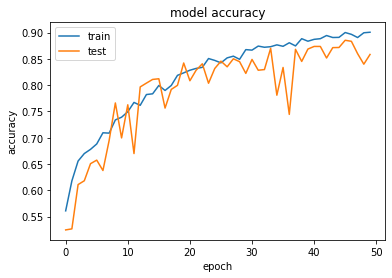

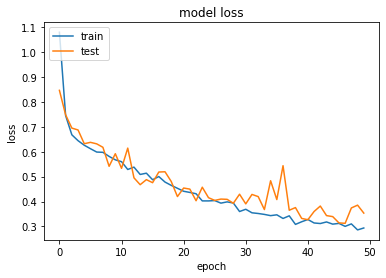

accuracy: 85.84%
Found 15998 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 67s 529ms/step - loss: 1.1066 - accuracy: 0.5565 - val_loss: 0.8676 - val_accuracy: 0.5910
Epoch 2/50
125/125 [==============================] - 65s 522ms/step - loss: 0.7673 - accuracy: 0.5930 - val_loss: 0.7525 - val_accuracy: 0.5800
Epoch 3/50
125/125 [==============================] - 63s 506ms/step - loss: 0.6842 - accuracy: 0.6233 - val_loss: 0.7853 - val_accuracy: 0.5132
Epoch 4/50
125/125 [==============================] - 63s 508ms/step - loss: 0.6391 - accuracy: 0.6716 - val_loss: 0.7069 - val_accuracy: 0.5872
Epoch 5/50
125/125 [==============================] - 63s 505ms/step - loss: 0.6194 - accuracy: 0.6910 - val_loss: 0.6224 - val_accuracy: 0.6790
Epoch 6/50
125/125 [==============================] - 64s 511m

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 66s 529ms/step - loss: 0.5936 - accuracy: 0.7310 - val_loss: 0.5693 - val_accuracy: 0.7448
Epoch 10/50
125/125 [==============================] - 68s 546ms/step - loss: 0.5697 - accuracy: 0.7477 - val_loss: 0.5705 - val_accuracy: 0.7405
Epoch 11/50
125/125 [==============================] - 67s 536ms/step - loss: 0.5631 - accuracy: 0.7615 - val_loss: 0.5454 - val_accuracy: 0.7667
Epoch 12/50
125/125 [==============================] - 66s 529ms/step - loss: 0.5398 - accuracy: 0.7772 - val_loss: 0.6212 - val_accuracy: 0.7067
Epoch 13/50
125/125 [==============================] - 62s 497ms/step - loss: 0.5310 - accuracy: 0.7766 - val_loss: 0.5852 - val_accuracy: 0.7038
Epoch 14/50
125/125 [==============================] - 64s 514ms/step - loss: 0.5241 - accuracy: 0.7778 - val_loss: 0.4984 - val_accuracy: 0.7905
Epoch 15/50
125/125 [==============================] - 66s 529ms/step - loss: 0.5217 - accuracy: 0.7883 - val_loss: 0.4834 - val_accurac

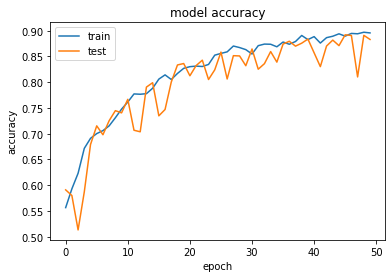

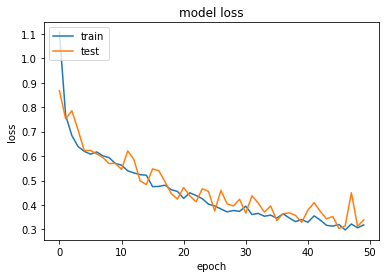

accuracy: 88.38%
Found 15998 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 5000 non-validated image filenames belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 67s 529ms/step - loss: 1.1144 - accuracy: 0.5420 - val_loss: 0.8719 - val_accuracy: 0.4940
Epoch 2/50
125/125 [==============================] - 66s 528ms/step - loss: 0.7753 - accuracy: 0.6050 - val_loss: 0.7598 - val_accuracy: 0.5425
Epoch 3/50
125/125 [==============================] - 66s 526ms/step - loss: 0.6823 - accuracy: 0.6400 - val_loss: 0.7192 - val_accuracy: 0.5655
Epoch 4/50
125/125 [==============================] - 67s 535ms/step - loss: 0.6487 - accuracy: 0.6618 - val_loss: 0.6868 - val_accuracy: 0.5928
Epoch 5/50
125/125 [==============================] - 68s 543ms/step - loss: 0.6389 - accuracy: 0.6733 - val_loss: 0.6347 - val_accuracy: 0.6883
Epoch 6/50
 44/125 [=========>....................] - ETA: 36s

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 68s 547ms/step - loss: 0.6188 - accuracy: 0.6900 - val_loss: 0.6249 - val_accuracy: 0.6580
Epoch 7/50
125/125 [==============================] - 69s 554ms/step - loss: 0.6008 - accuracy: 0.7089 - val_loss: 0.6133 - val_accuracy: 0.7013
Epoch 8/50
125/125 [==============================] - 70s 562ms/step - loss: 0.6048 - accuracy: 0.7088 - val_loss: 0.5756 - val_accuracy: 0.7197
Epoch 9/50
125/125 [==============================] - 88s 702ms/step - loss: 0.5917 - accuracy: 0.7322 - val_loss: 0.6421 - val_accuracy: 0.6615
Epoch 10/50
125/125 [==============================] - 87s 700ms/step - loss: 0.5874 - accuracy: 0.7330 - val_loss: 0.5915 - val_accuracy: 0.7082
Epoch 11/50
125/125 [==============================] - 88s 700ms/step - loss: 0.5770 - accuracy: 0.7437 - val_loss: 0.5538 - val_accuracy: 0.7440
Epoch 12/50
125/125 [==============================] - 87s 699ms/step - loss: 0.5682 - accuracy: 0.7412 - val_loss: 0.5713 - val_accuracy: 

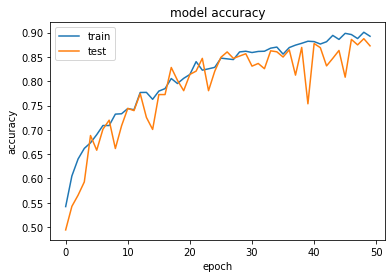

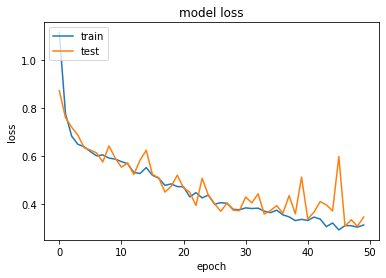

accuracy: 86.64%
Found 15999 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 4999 non-validated image filenames belonging to 2 classes.
Epoch 1/50
 45/125 [=========>....................] - ETA: 34s - loss: 1.5682 - accuracy: 0.4931

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


125/125 [==============================] - 66s 524ms/step - loss: 1.1954 - accuracy: 0.5455 - val_loss: 0.9094 - val_accuracy: 0.5090
Epoch 2/50
125/125 [==============================] - 65s 520ms/step - loss: 0.8017 - accuracy: 0.6053 - val_loss: 0.7737 - val_accuracy: 0.5922
Epoch 3/50
125/125 [==============================] - 65s 521ms/step - loss: 0.6991 - accuracy: 0.6417 - val_loss: 0.7163 - val_accuracy: 0.6495
Epoch 4/50
125/125 [==============================] - 65s 518ms/step - loss: 0.6630 - accuracy: 0.6668 - val_loss: 0.6988 - val_accuracy: 0.5645
Epoch 5/50
125/125 [==============================] - 65s 519ms/step - loss: 0.6300 - accuracy: 0.6959 - val_loss: 0.6457 - val_accuracy: 0.6773
Epoch 6/50
125/125 [==============================] - 65s 518ms/step - loss: 0.6175 - accuracy: 0.7055 - val_loss: 0.6172 - val_accuracy: 0.7050
Epoch 7/50
125/125 [==============================] - 65s 519ms/step - loss: 0.6140 - accuracy: 0.6998 - val_loss: 0.6026 - val_accuracy: 0.7

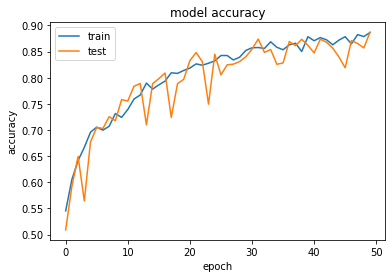

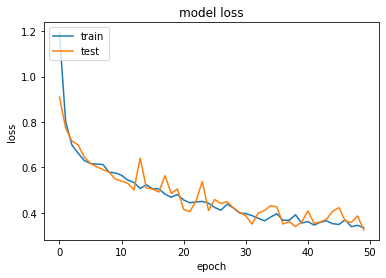

accuracy: 88.64%
Found 15999 non-validated image filenames belonging to 2 classes.
Found 4000 non-validated image filenames belonging to 2 classes.
Found 4999 non-validated image filenames belonging to 2 classes.
Epoch 1/50
125/125 [==============================] - 65s 518ms/step - loss: 1.1284 - accuracy: 0.5470 - val_loss: 0.8860 - val_accuracy: 0.4988
Epoch 2/50
125/125 [==============================] - 66s 529ms/step - loss: 0.7744 - accuracy: 0.6087 - val_loss: 0.7636 - val_accuracy: 0.5115
Epoch 3/50
125/125 [==============================] - 64s 511ms/step - loss: 0.6769 - accuracy: 0.6460 - val_loss: 0.7209 - val_accuracy: 0.6120
Epoch 4/50
125/125 [==============================] - 65s 516ms/step - loss: 0.6444 - accuracy: 0.6593 - val_loss: 0.7051 - val_accuracy: 0.5723
Epoch 5/50
125/125 [==============================] - 65s 518ms/step - loss: 0.6412 - accuracy: 0.6595 - val_loss: 0.6405 - val_accuracy: 0.6545
Epoch 6/50
125/125 [==============================] - 63s 504m

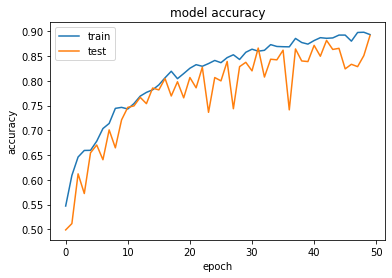

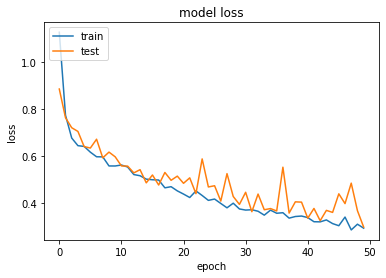

c:\Users\giorg\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


accuracy: 89.80%
CV accuracy = 87.86% (+/- 1.43%)


In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=66)
cvscores = []
kf2 = KFold(n_splits=5,shuffle=True, random_state=66)
ImageFile.LOAD_TRUNCATED_IMAGES = True
for val_train_index, test_index in kf.split(df):
    val_train, df_test = df.iloc[val_train_index], df.iloc[test_index]
    train, validation = next(kf2.split(val_train))
    df_train, df_validation = val_train.iloc[train], val_train.iloc[validation]
     

    image_datagen = ImageDataGenerator(
    rescale=1./255)

    train_generator = image_datagen.flow_from_dataframe(
        df_train, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    val_generator = image_datagen.flow_from_dataframe(
        df_validation, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32)

    test_datagen=ImageDataGenerator(rescale=1./255)

    test_generator = image_datagen.flow_from_dataframe(
        df_test, 
        directory = r"C:\Users\giorg\Desktop\Machine L\CatsDogs\Dataset", 
        x_col='filename',
        y_col='label',
        validate_filenames=False,
        target_size=Image_Size,
        color_mode="rgb",
        class_mode='categorical',
        batch_size=32) 

    model  = create_model_6()

    history = model.fit(
    train_generator,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 125,
    steps_per_epoch = 125)

    model.summary()
    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    print(loss_values)
    print(val_loss_values)

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    scores = model.evaluate(test_generator, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

    
print("CV accuracy = %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))